<a href="https://colab.research.google.com/github/salim-hbk/ai-ml/blob/main/TF_Custom_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [25]:
true_w = 3
true_b  = 0.2
max_data = 1000
tf.random.set_seed(5)
train_x = tf.random.normal(shape=[max_data])
test_x = tf.random.normal(shape=[500])
train_y = (true_w * train_x)+true_b
test_y = (true_w * test_x)+true_b

In [26]:
class Model():

  def __init__(self):
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(0.)

  def __call__(self, x):
    return (self.w*x)+self.b
  
model = Model()

In [30]:
def loss(y_true, y_exp):
  return tf.reduce_mean(tf.square(y_exp - y_true))

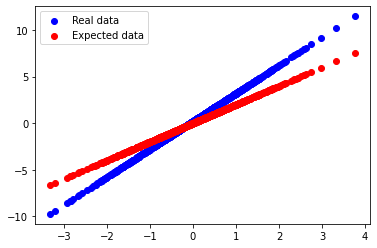

In [31]:
def plot_data(input, output, predicted):
  actual = plt.scatter(input, output, c='b')
  expected =plt.scatter(input, predicted, c = 'r')
  plt.legend((actual, expected), ('Real data', 'Expected data'))

plot_data(train_x, train_y, model(train_x))

In [16]:
lr = 0.01

In [32]:
def train(train_x, train_y, lr):
  with tf.GradientTape() as t:
    current_loss = loss(train_y, model(train_x))
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub((lr*dw))
  model.b.assign_sub((lr*db))
  return current_loss

In [33]:
list_w =[]
list_b = []
epochs = range(15)
losses = []

for i in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(train_x, train_y, 0.1)
  losses.append(current_loss)

  print(f'Epoch :{i} --- Weight: {list_w[-1]} --- Bias: {list_b[-1]}, --- Loss: {current_loss}')


Epoch :0 --- Weight: 2.0 --- Bias: 0.0, --- Loss: 1.084196925163269
Epoch :1 --- Weight: 2.2098617553710938 --- Bias: 0.034887779504060745, --- Loss: 0.6788871884346008
Epoch :2 --- Weight: 2.375645399093628 --- Bias: 0.0638708621263504, --- Loss: 0.42521920800209045
Epoch :3 --- Weight: 2.5066161155700684 --- Bias: 0.08790484815835953, --- Loss: 0.26641327142715454
Epoch :4 --- Weight: 2.6100900173187256 --- Bias: 0.10780158638954163, --- Loss: 0.16696621477603912
Epoch :5 --- Weight: 2.6918444633483887 --- Bias: 0.1242479607462883, --- Loss: 0.10467267781496048
Epoch :6 --- Weight: 2.7564423084259033 --- Bias: 0.13782300055027008, --- Loss: 0.06564042717218399
Epoch :7 --- Weight: 2.8074870109558105 --- Bias: 0.14901326596736908, --- Loss: 0.041176024824380875
Epoch :8 --- Weight: 2.8478243350982666 --- Bias: 0.15822644531726837, --- Loss: 0.025837741792201996
Epoch :9 --- Weight: 2.87970232963562 --- Bias: 0.1658031940460205, --- Loss: 0.01621820405125618
Epoch :10 --- Weight: 2.904

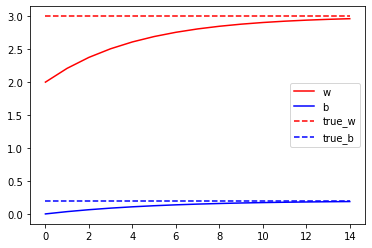

In [38]:
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([true_w]* len(epochs), 'r--',
         [true_b]*len(epochs), 'b--')

plt.legend(['w', 'b', 'true_w', 'true_b'])
plt.show()